In [3]:
import os
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages')
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import shutil as sh
import re
import os
import matplotlib as mpl
from matplotlib.colors import Normalize 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

In [25]:
class calc_BTBT():
    def __init__(self):
        self.R1_list=np.linspace(4.4,4.8,5)
        self.R2_list=np.linspace(0.8,1.3,6)
        self.R3_list=np.array([np.round(r,1) for r in np.linspace(-4.0,4.0,81)])
        self.path='~/Working/interaction/mono-C9-BTBT/'
        self.N=41#0～4Åまでの刻み数

    def calculator(self,path_file):
        with open(path_file,'r') as f:
            lines=f.readlines()
        lines_E=[]
        for line in lines:
            if line.find('E(RB3LYP)')>-1:
                lines_E.append(float(line.split()[4])*627.510)
        E_list=[lines_E[5*i]-lines_E[5*i+1]-lines_E[5*i+2] for i in range(int(len(lines_E)/5))]
        
        E_mono_i=lines_E[3];E_mono_t=lines_E[4]#monomerのエネルギー
        
        return E_list,E_mono_i,E_mono_t

##### calc #####

    #とりあえずcsvに全結果まとめる関数
    def make_csv_step1(self,glide_mode):#a,b映進どちらか
        df=pd.DataFrame(columns=['R1','R2','heri','phi','E_mono_i','E_mono_t','E_t1','E_t3','E_p','E'])
        out_dir=self.path+'step1\\glide='+glide_mode#outファイルのあるディレクトリ
        for file in os.listdir(out_dir):
            if file[-4:]!='.out' and file[-4:]!='.log':
                continue
            x,R1,y,R2,z,theta,_,phi=re.split('[_=]', file[:-4])
            E_list,E_mono_i,E_mono_t=self.calculator(out_dir+'\\'+file)
            if len(E_list)!=3:
                print(file)
            E_t1=float(E_list[0]);E_t3=float(E_list[1]);E_p=float(E_list[2])
            E_mono_i=float(E_mono_i);E_mono_t=float(E_mono_t)
            data=pd.Series([R1,R2,theta,phi,E_mono_i,E_mono_t,E_t1,E_t3,E_p,2*E_t1+2*E_t3+2*E_p+E_mono_i+E_mono_t],index=df.columns)#セル当たりの格子エネルギー
            df=df.append(data,ignore_index=True)
        df_6inter=df.sort_values('heri')
        df_6inter_new=df_6inter.reset_index(drop=True)
        df_6inter_new.to_csv(out_dir+'\\step1.csv',index=False)

    def make_csv_step2(self,glide_mode):#a,b映進どちらか
        df=pd.DataFrame(columns=['R1','R2','heri','R3t','R3p','phi1','phi2','E_mono_i','E_mono_t','E_t1','E_t2','E_t3','E_t4','E_p','E'])
        out_dir=self.path+'step2\\glide='+glide_mode#outファイルのあるディレクトリ
        for file in os.listdir(out_dir):
            if file[-4:]!='.out' and file[-4:]!='.log':
                continue
            _,R1,_,R2,_,theta,_,R3t,_,R3p,_,phi1,_,phi2=re.split('[_=]', file[:-4])
            E_list,E_mono_i,E_mono_t=self.calculator(out_dir+'\\'+file)
            if len(E_list)!=5:
                print(file)
                continue
            E_t1=float(E_list[0]);E_t2=float(E_list[1]);E_t3=float(E_list[2]);E_t4=float(E_list[3]);E_p=float(E_list[4])
            E_mono_i=float(E_mono_i);E_mono_t=float(E_mono_t)
            data=pd.Series([R1,R2,theta,R3t,R3p,phi1,phi2,E_mono_i,E_mono_t,E_t1,E_t2,E_t3,E_t4,E_p,E_t1+E_t2+E_t3+E_t4+2*E_p+E_mono_i+E_mono_t],index=df.columns)#セル当たりの格子エネルギー
            df=df.append(data,ignore_index=True)
        df.to_csv(out_dir+'\\step2.csv',index=False)
        
#     def make_csv_step3(self,glide_mode,edge_mode):
#         #Z=1か2かで分ける。
#         df_1=pd.DataFrame(columns=['R1','R2','heri','R3_t','R3_p','Ra_i0','Rb_i0','R3_i0','glide','E','i0','ip1','it1','it2','ip2','it3','it4'])
#         df_2=pd.DataFrame(columns=['R1','R2','heri','R3_t','R3_p','Ra_i0','Rb_i0','R3_i0','glide','E','i0','ip1','it1','it2','ip2','it3','it4'])
#         path_csv=self.path+'step3\\glide='+glide_mode+'\\edge='+edge_mode+'\\'
#         for file in os.listdir(path_csv):
#             if file[-4:]!='.log':
#                 continue
#             _,R1_t,_,R2_t,_,heri,_,R3_t,_,R3_p,_,_,Ra_i0,_,_,Rb_i0,_,_,R3_i0,_,glide_mode,_,Z=re.split('[=_]',file[:-4])
#             E_list=self.calculator(path_csv+file)
#             para_list=list(map(float,[R1_t,R2_t,heri,R3_t,R3_p,Ra_i0,Rb_i0,R3_i0]))
#             if len(E_list)!=7:
#                 print(para_list)
#             data=pd.Series(para_list+[glide_mode,sum(E_list)]+E_list,index=df_1.columns)#Z=1,2で同じ操作。データ格納
#             if int(Z)==1:
#                 df_1=df_1.append(data,ignore_index=True)
#             elif int(Z)==2:
#                 df_2=df_2.append(data,ignore_index=True)
#         #生データdf_1,df_2をcsv出力
#         df_raw=pd.concat([df_1,df_2],ignore_index=True);df_raw.to_csv(path_csv+'raw_data.csv')
        
#         #df_2のパラメータをZ=1へ変換してマージ。E_sumだけを出力
#         if glide_mode=='a':
#             df_2['R3_t']=df_2['R3_t'].values-df_2['R3_p'].values#R3t=R3t2'=R3t'-R3p'
#             df_2['R3_p']=-df_2['R3_p'].values#R3_p=-R3_p'
#             df_2['Rb_i0']=-df_2['Rb_i0'].values#Rb_i0:-Rb_i0'
            
#         elif glide_mode=='b':
#             df_2['R3_t']=df_2['R3_p'].values-df_2['R3_t'].values#R3t=-R3t2'=R3p'-R3t'
#             df_2['Ra_i0']=-df_2['Ra_i0'].values#Rb_i0:-Rb_i0'
            
#         self.df_1=df_1;self.df_2=df_2
#         df=pd.merge(df_1.round(6).loc[:,'R1':'E'],df_2.round(6).loc[:,'R1':'E'],on=['R1','R2','heri','R3_t','R3_p','Ra_i0','Rb_i0','R3_i0','glide'],suffixes=['_Z=1','_Z=2'])
#         assert df.shape[0]!=0
#         df['E_total']=df['E_Z=1'].values+df['E_Z=2'].values
#         df.to_csv(path_csv+'merge.csv')

# step1

In [12]:
calc_1=calc_BTBT()

In [4]:
calc_1.make_csv_step1('a')

In [13]:
#df_glide_a=pd.read_csv(calc_1.path+'step1\\glide=a\\step1.csv')
df_glide_b=pd.read_csv(calc_1.path+'step1/glide=b/step1.csv')

#df_plot_glide_a=df_glide_a.loc[:,['theta','E']].groupby('theta').min()
df_plot_glide_b=df_glide_b[df_glide_b['phi']==11]

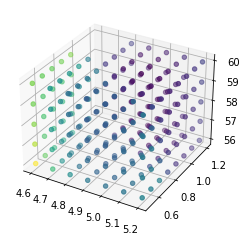

In [14]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df_glide_b['R1'],df_glide_b['R2'],df_glide_b['heri'],c=df_glide_b['E'])
plt.show()

In [24]:
df_glide_b.loc[df_glide_b['E'].argmin()]#-2119603.24913454

R1          4.900000e+00
R2          1.100000e+00
heri        5.600000e+01
phi        -1.370000e+02
E_mono_i   -1.059766e+06
E_mono_t   -1.059766e+06
E_t1       -1.384326e+01
E_t3       -1.352912e+01
E_p        -7.777811e+00
E          -2.119603e+06
Name: 24, dtype: float64

# step2

In [10]:
#edge,glideによってt2の計算式変えるべき
calc_2=calc_BTBT()
calc_2.make_csv_step2(glide_mode='a')

# step3

In [3]:
calc_3=calc_BTBT()
calc_3.make_csv_step3(glide_mode='b',edge_mode='a')

# YorZ

In [3]:
calc_alkyl=calc_BTBT()
E_Ymin_list,E_mono_i,E_mono_t=calc_alkyl.calculator('C:\\Users\\youmo\\OSC\\interaction\\mono-C9-BTBT\\YorZ\\Y-type_R1=5.0_R2=1.0_theta=58.0_phi=-135.0.log')
E_Ymin_alkyl=2*sum(E_Ymin_list)
E_Zmin_list,E_mono_i,E_mono_t=calc_alkyl.calculator('C:\\Users\\youmo\\OSC\\interaction\\mono-C9-BTBT\\YorZ\\Z-type_R1=5.0_R2=0.7_theta=58.0_phi=86.0.log')
E_Zmin_alkyl=2*sum(E_Zmin_list)


In [4]:
E_Ymin_alkyl,E_Zmin_alkyl

(-21.393375889922027, -14.529780696728267)

In [5]:
#t1,t3,p
E_Ymin_list,E_Zmin_list

([-4.070627249544486, -3.8973798961378634, -2.7286807992786635],
 [-3.9196690513635986, -2.202727017691359, -1.142494279309176])